# Natas representation of grids

Nata has two type of representation for grids, `GridArray` and `GridDataset`. Both types are **array-like containers** which have a common interface for

- Annotations (`.name`, `.label`, `.unit`)
- Plugins (`.plot`, `.fft`, ...)

and both can be created **from a file** (using `.from_path`) or **from an array-like object** (using `.from_array`).

In [1]:
from nata.containers import GridArray
from nata.containers import GridDataset

## How to create GridArray and GridDataset

Create an `GridArray` from a numpy array with annotations.

In [2]:
import numpy as np

example_array = np.arange(32, dtype=np.float64).reshape((4, 8))

grid = GridArray.from_array(example_array)
grid


| **GridArray** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (4, 8) |
| **dtype** | float64 |
| **time**  | None |
| **axes**  | Axis(axis0), Axis(axis1) |



By default nata will provide some default parameters when creating a container object. This can be changed at creation

In [3]:
from nata.containers import Axis

grid = GridArray.from_array(
    example_array,
    name="some_name",
    label="some label",
    unit="some unit",
    time=10.0,
    axes=(
        Axis.from_array([0, 1, 2, 3], name="a1"),
        Axis.from_array(np.arange(8) - 10, name="a2"),
    )
)
grid


| **GridArray** | |
| ---: | :--- |
| **name**  | some_name |
| **label** | some label |
| **unit**  | some unit |
| **shape** | (4, 8) |
| **dtype** | float64 |
| **time**  | 10.0 |
| **axes**  | Axis(a1), Axis(a2) |



or by changing each property individually

In [4]:
grid.name = "some_new_name"
grid.label = "some new label"
grid.unit = "some new unit"
grid


| **GridArray** | |
| ---: | :--- |
| **name**  | some_new_name |
| **label** | some new label |
| **unit**  | some new unit |
| **shape** | (4, 8) |
| **dtype** | float64 |
| **time**  | 10.0 |
| **axes**  | Axis(a1), Axis(a2) |



The `GridArray` represent a grid at **one** specific time step

In [5]:
print(f"{grid.time.shape = }")
print(f"{grid.axes[0].shape = }")
print(f"{grid.axes[1].shape = }")

grid.time.shape = ()
grid.axes[0].shape = (4,)
grid.axes[1].shape = (8,)


but the `GridDataset` represents a grid at **different time steps**

In [6]:
grid_ds = GridDataset.from_array(example_array)
grid_ds


| **GridDataset** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (4, 8) |
| **dtype** | float64 |
| **time**  | [0 1 2 3] |
| **axes**  | Axis(time), Axis(axis0) |



In [7]:
print(f"{grid_ds.shape = }")
print(f"{grid_ds.time.shape = }")
print(f"{grid_ds.axes[0].shape = }")
print(f"{grid_ds.axes[1].shape = }")

grid_ds.shape = (4, 8)
grid_ds.time.shape = (4,)
grid_ds.axes[0].shape = (4,)
grid_ds.axes[1].shape = (4, 8)


## Reading from path

Grids can be created by using the `.from_path` method.

In [8]:
from nata import examples

Here are some example grid files:

In [9]:
!ls -l {examples.grids}

total 48
-rwxr-xr-x 1 natadev natadev 7336 May 13 22:53 grid-1d-0.h5
-rwxr-xr-x 1 natadev natadev 7336 May 13 22:53 grid-1d-1.h5
-rwxr-xr-x 1 natadev natadev 7336 May 13 22:53 grid-1d-2.h5
-rwxr-xr-x 1 natadev natadev 7336 May 13 22:53 grid-1d-3.h5
-rwxr-xr-x 1 natadev natadev 7336 May 13 22:53 grid-1d-4.h5
-rwxr-xr-x 1 natadev natadev 7336 May 13 22:53 grid-1d-5.h5


To create a `GridArray` from **one file** simply use the `.from_path` method

In [10]:
one_grid = GridArray.from_path(examples.grids / "grid-1d-0.h5")
one_grid


| **GridArray** | |
| ---: | :--- |
| **name**  | e1 |
| **label** | E_1 |
| **unit**  | m_e c \omega_p e^{-1} |
| **shape** | (120,) |
| **dtype** | float32 |
| **time**  | 0.0 |
| **axes**  | Axis(x1) |



or create a `GridDataset` from **several files**

In [11]:
multiple_grids = GridDataset.from_path(examples.grids / "*")
multiple_grids


| **GridDataset** | |
| ---: | :--- |
| **name**  | e1 |
| **label** | E_1 |
| **unit**  | m_e c \omega_p e^{-1} |
| **shape** | (6, 120) |
| **dtype** | float32 |
| **time**  | [ 0. 10. 20. 30. 40. 50.] |
| **axes**  | Axis(time), Axis(x1) |



## Indexing

Nata's container support object indexing, e.g. indexing along the temporal axis

In [12]:
multiple_grids[2]


| **GridArray** | |
| ---: | :--- |
| **name**  | e1 |
| **label** | E_1 |
| **unit**  | m_e c \omega_p e^{-1} |
| **shape** | (120,) |
| **dtype** | float32 |
| **time**  | 20.0 |
| **axes**  | Axis(x1) |



or indexing along the spatial axis

In [13]:
multiple_grids[::2, 10:-25:3]


| **GridDataset** | |
| ---: | :--- |
| **name**  | e1 |
| **label** | E_1 |
| **unit**  | m_e c \omega_p e^{-1} |
| **shape** | (3, 29) |
| **dtype** | float32 |
| **time**  | [ 0. 20. 40.] |
| **axes**  | Axis(time), Axis(x1) |



## Getting the data stored

In [14]:
type(multiple_grids.to_numpy())

numpy.ndarray

In [15]:
multiple_grids[-1, 10:25].to_numpy()

array([ 0.03756667, -0.02527247, -0.05402965, -0.0644568 , -0.08836149,
       -0.13276438, -0.16449456, -0.18726616, -0.21021022, -0.17068724,
       -0.0675886 ,  0.05470179,  0.15090737,  0.16236047,  0.1385156 ],
      dtype=float32)

Data in nata is stored in dask array. This allow 

In [16]:
multiple_grids.to_dask()

dask.array<stack, shape=(6, 120), dtype=float32, chunksize=(1, 120), chunktype=numpy.ndarray>

## Grid containers behave like numpy arrays

In [17]:
example = GridArray.from_array([0, 1, 4, 9], name="example", label="\chi")
example


| **GridArray** | |
| ---: | :--- |
| **name**  | example |
| **label** | \chi |
| **unit**  | '' |
| **shape** | (4,) |
| **dtype** | int64 |
| **time**  | None |
| **axes**  | Axis(axis0) |



In [18]:
sqrt_example = np.sqrt(example)
sqrt_example.to_numpy()

array([0., 1., 2., 3.])

While numpy functions are directly supported by using numpy's dispatch mechanism, annotations are not conserved

In [19]:
sqrt_example


| **GridArray** | |
| ---: | :--- |
| **name**  | unnamed |
| **label** | unlabeled |
| **unit**  | '' |
| **shape** | (4,) |
| **dtype** | float64 |
| **time**  | None |
| **axes**  | Axis(axis0) |



To cover this special cases, nata introduces plugins. They are handy helper for repeatable tasks

In [20]:
from nata.containers import register_plugin

@register_plugin(name="sqrt")
def sqrt_for_grids(data: GridArray):
    result = np.sqrt(data)
    result.name = "sqrt_" + data.name
    result.label = f"\sqrt({data.label})"
    
    return result

example.sqrt()


| **GridArray** | |
| ---: | :--- |
| **name**  | sqrt_example |
| **label** | \sqrt(\chi) |
| **unit**  | '' |
| **shape** | (4,) |
| **dtype** | float64 |
| **time**  | None |
| **axes**  | Axis(axis0) |



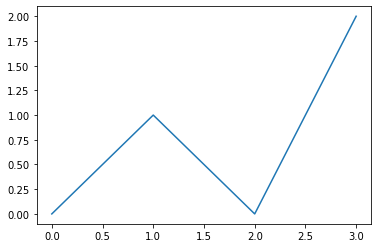

In [21]:
nata_grid = GridArray.from_array([0, 1, 0, 2])

import matplotlib.pyplot as plt

plt.plot(nata_grid)